# Part #03: Model Salection

## Step #01: Selecting the Right Model(s)

### Set up the workspace

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
# Read the results from the previous section:
with open("./assets/preprocessing_results.pkl", mode="rb") as file_bin:
    resulst = pickle.load(file_bin)

In [3]:
# Unpack train and test sets:
_, X_train, X_test, y_train, y_test = resulst.values()

### Find a good candidate(s) for the problem at hand

- Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
- Different estimators are better suited for different types of data and different problems.
- This **[flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)** is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data.

In [4]:
# Instantiate a dummy regressor for baseline comparison:
dummy_reg = DummyRegressor()

In [5]:
# Instantiate some candidate models:
linear_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor()
adaboost_tree_reg = AdaBoostRegressor(DecisionTreeRegressor())
random_forest_reg = RandomForestRegressor()
xgb_reg = XGBRegressor()

## Step #02: Selecting a Scoring Function(s)

In [6]:
# Define scoring function(s):
r2 = make_scorer(r2_score, greater_is_better=True)
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

## Step #03: Compare Different Models by Cross-Validation

- Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.
- A solution to this problem is a procedure called cross-validation (CV for short).

- Compare using R-squared:

Validating dummy_reg...
Validating dummy_reg done in 0.00 minutes!

Validating linear_reg...
Validating linear_reg done in 0.00 minutes!

Validating knn_reg...
Validating knn_reg done in 0.03 minutes!

Validating tree_reg...
Validating tree_reg done in 0.03 minutes!

Validating adaboost_tree_reg...
Validating adaboost_tree_reg done in 1.33 minutes!

Validating random_forest_reg...
Validating random_forest_reg done in 3.35 minutes!

Validating xgb_reg...
Validating xgb_reg done in 0.13 minutes!

                    min  mean   max
dummy_reg         -0.00 -0.00 -0.00
linear_reg         0.58  0.59  0.61
knn_reg            0.66  0.69  0.71
tree_reg           0.63  0.65  0.66
adaboost_tree_reg  0.80  0.81  0.83
random_forest_reg  0.80  0.81  0.83
xgb_reg            0.81  0.82  0.84




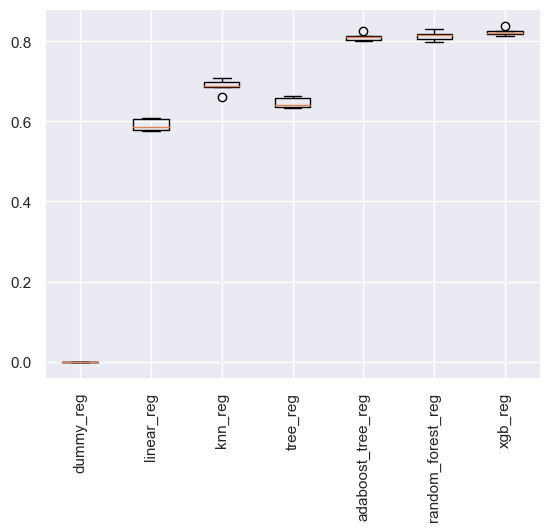

CPU times: total: 5min 10s
Wall time: 4min 55s


In [7]:
%%time
# Compare different models:
%run "./helpers/validate_model.py";
results = compare_models(
    X_train,
    y_train,
    r2,
    cv=3,
    dummy_reg=dummy_reg,
    linear_reg=linear_reg,
    knn_reg=knn_reg,
    tree_reg=tree_reg,
    adaboost_tree_reg=adaboost_tree_reg,
    random_forest_reg=random_forest_reg,
    xgb_reg=xgb_reg
);

- Compare using RMSE (more interpretable):

Validating dummy_reg...
Validating dummy_reg done in 0.00 minutes!

Validating linear_reg...
Validating linear_reg done in 0.00 minutes!

Validating knn_reg...
Validating knn_reg done in 0.03 minutes!

Validating tree_reg...
Validating tree_reg done in 0.02 minutes!

Validating adaboost_tree_reg...
Validating adaboost_tree_reg done in 1.27 minutes!

Validating random_forest_reg...
Validating random_forest_reg done in 3.55 minutes!

Validating xgb_reg...
Validating xgb_reg done in 0.15 minutes!

                         min       mean        max
dummy_reg         -115968.43 -114887.34 -113479.43
linear_reg         -74706.70  -73484.12  -71818.21
knn_reg            -66615.09  -64104.35  -61943.06
tree_reg           -70211.42  -68217.67  -66905.47
adaboost_tree_reg  -50665.90  -49404.37  -46956.65
random_forest_reg  -51277.15  -49664.22  -48095.65
xgb_reg            -49432.46  -48263.81  -46433.53




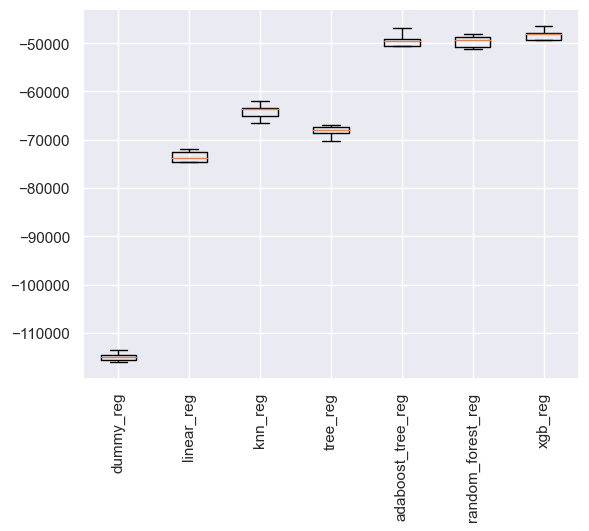

CPU times: total: 5min 14s
Wall time: 5min 4s


In [8]:
%%time
# Compare different models:
%run "./helpers/validate_model.py";
results = compare_models(
    X_train,
    y_train,
    rmse,
    cv=3,
    dummy_reg=dummy_reg,
    linear_reg=linear_reg,
    knn_reg=knn_reg,
    tree_reg=tree_reg,
    adaboost_tree_reg=adaboost_tree_reg,
    random_forest_reg=random_forest_reg,
    xgb_reg=xgb_reg
);